In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
sector2013 = pd.read_excel('N_2013.xlsx')
sector2013

,Municipio,Sector 11,Sector 21,Sector 22,Sector 23,Sector 31-33,Sector 43,Sector 46,Sector 48-49,Sector 51,...,Sector 53,Sector 54,Sector 55,Sector 56,Sector 61,Sector 62,Sector 71,Sector 72,Sector 81,Unnamed: 20
0,002 Azcapotzalco,0.0,0.0,0.000,362.064,42376.530,6201.534,3138.344,5040.943,622.543,...,492.993,343.143,0.000,26263.324,801.625,149.907,77.887,657.810,1321.362,NaN
1,003 Coyoacán,0.0,0.0,0.000,348.414,5629.893,3754.140,8303.332,316.872,2744.118,...,808.745,549.693,979.694,1340.316,1260.981,349.676,1127.298,1301.447,655.760,NaN
2,004 Cuajimalpa de Morelos,0.0,0.0,0.000,519.632,2587.440,1889.444,2872.238,0.000,6520.395,...,589.840,1426.840,42895.382,6755.027,827.535,447.732,1.482,732.263,3121.671,NaN
3,005 Gustavo A. Madero,0.0,0.0,0.000,237.014,5839.265,2872.805,6952.841,2148.134,314.567,...,200.801,465.877,0.000,641.626,1256.401,614.050,189.356,1324.245,2817.010,NaN
4,006 Iztacalco,0.0,0.0,0.000,131.701,5527.769,3338.362,1780.389,732.513,21.903,...,159.949,278.466,0.000,713.497,276.240,163.123,33.858,366.309,287.170,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,112 Villa del Carbón,1.2,0.0,0.000,0.000,24.174,13.081,46.877,0.000,0.000,...,1.179,5.625,0.000,0.456,1.699,1.620,0.688,9.243,2.702,NaN
98,120 Zumpango,0.0,0.0,0.000,0.000,103.630,222.995,668.154,6.866,42.926,...,8.318,13.769,0.000,7.071,21.294,25.614,3.422,51.173,53.704,NaN
99,121 Cuautitlán Izcalli,0.0,0.0,79.563,63.290,24556.463,2236.952,2972.591,1362.961,172.628,...,167.079,184.675,0.000,585.224,536.889,107.891,124.618,467.239,475.231,NaN
100,122 Valle de Chalco Solidaridad,0.0,0.0,0.000,1.627,491.168,73.570,880.881,7.817,0.000,...,15.591,9.430,0.000,0.000,51.900,30.771,12.996,115.269,105.067,NaN


In [3]:
sector2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Municipio      102 non-null    object 
 1   Sector 11      102 non-null    float64
 2   Sector 21      102 non-null    float64
 3   Sector 22      102 non-null    float64
 4   Sector 23      102 non-null    float64
 5   Sector 31-33   102 non-null    float64
 6   Sector 43      102 non-null    float64
 7   Sector 46      102 non-null    float64
 8   Sector 48-49   102 non-null    float64
 9   Sector 51      102 non-null    float64
 10  Sector 52      102 non-null    float64
 11  Sector 53      102 non-null    float64
 12  Sector 54      102 non-null    float64
 13  Sector 55      102 non-null    float64
 14  Sector 56      102 non-null    float64
 15  Sector 61      102 non-null    float64
 16  Sector 62      102 non-null    float64
 17  Sector 71      102 non-null    float64
 18  Sector 72 

In [4]:
del sector2013['Unnamed: 20']

In [5]:
sec2013 = sector2013.copy()
sec2013.loc['Total'] = sec2013.sum(numeric_only = True, axis=0)
sec2013.loc[:, 'Total'] = sec2013.sum(numeric_only = True, axis=1)
sec2013

,Municipio,Sector 11,Sector 21,Sector 22,Sector 23,Sector 31-33,Sector 43,Sector 46,Sector 48-49,Sector 51,...,Sector 53,Sector 54,Sector 55,Sector 56,Sector 61,Sector 62,Sector 71,Sector 72,Sector 81,Total
0,002 Azcapotzalco,0.00,0.000,0.000,362.064,42376.530,6201.534,3138.344,5040.943,622.543,...,492.993,343.143,0.000,26263.324,801.625,149.907,77.887,657.810,1321.362,88098.769
1,003 Coyoacán,0.00,0.000,0.000,348.414,5629.893,3754.140,8303.332,316.872,2744.118,...,808.745,549.693,979.694,1340.316,1260.981,349.676,1127.298,1301.447,655.760,35925.883
2,004 Cuajimalpa de Morelos,0.00,0.000,0.000,519.632,2587.440,1889.444,2872.238,0.000,6520.395,...,589.840,1426.840,42895.382,6755.027,827.535,447.732,1.482,732.263,3121.671,82622.308
3,005 Gustavo A. Madero,0.00,0.000,0.000,237.014,5839.265,2872.805,6952.841,2148.134,314.567,...,200.801,465.877,0.000,641.626,1256.401,614.050,189.356,1324.245,2817.010,25926.816
4,006 Iztacalco,0.00,0.000,0.000,131.701,5527.769,3338.362,1780.389,732.513,21.903,...,159.949,278.466,0.000,713.497,276.240,163.123,33.858,366.309,287.170,13826.002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,120 Zumpango,0.00,0.000,0.000,0.000,103.630,222.995,668.154,6.866,42.926,...,8.318,13.769,0.000,7.071,21.294,25.614,3.422,51.173,53.704,1254.145
99,121 Cuautitlán Izcalli,0.00,0.000,79.563,63.290,24556.463,2236.952,2972.591,1362.961,172.628,...,167.079,184.675,0.000,585.224,536.889,107.891,124.618,467.239,475.231,34451.007
100,122 Valle de Chalco Solidaridad,0.00,0.000,0.000,1.627,491.168,73.570,880.881,7.817,0.000,...,15.591,9.430,0.000,0.000,51.900,30.771,12.996,115.269,105.067,1823.741
101,125 Tonanitla,0.00,0.000,0.000,0.000,6.173,0.501,8.528,0.000,0.000,...,0.213,0.000,0.000,0.520,0.000,0.000,0.000,2.077,1.292,19.304


In [6]:
sec2013[0:102].describe()

,Sector 11,Sector 21,Sector 22,Sector 23,Sector 31-33,Sector 43,Sector 46,Sector 48-49,Sector 51,Sector 52,Sector 53,Sector 54,Sector 55,Sector 56,Sector 61,Sector 62,Sector 71,Sector 72,Sector 81,Total
count,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.053529,0.839657,2039.234951,257.506441,2527.120500,1017.965520,1186.443892,696.186402,1035.157235,4552.379020,118.374314,383.774284,1601.169657,1200.284627,261.131716,134.648647,81.049216,301.540235,331.532471,17726.392314
std,0.242559,3.539076,20568.589964,1092.358483,6071.567315,2534.383042,2405.233933,3026.209939,6487.670992,20548.779987,351.110872,1757.610234,9151.456680,4995.572008,645.060103,426.967222,236.693353,796.345820,968.177726,59692.332660
min,0.000000,0.000000,0.000000,0.000000,0.000000,-72.720000,0.000000,0.000000,-0.743000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-650.237000,0.000000,0.000000,0.000000,2.530000
25%,0.000000,0.000000,0.000000,0.000000,26.668000,2.180750,14.356000,0.000000,0.000000,0.000000,0.359750,0.274250,0.000000,0.659250,0.790750,1.198750,0.334000,4.206750,2.880000,82.189750
50%,0.000000,0.000000,0.000000,0.000000,103.247500,32.823000,78.394000,2.334000,0.137500,0.000000,2.393000,2.772500,0.000000,2.322500,8.246500,3.481000,1.636000,11.418000,13.890500,353.589500
75%,0.000000,0.000000,0.000000,46.623750,1510.091000,647.916500,1137.300500,86.736500,54.869250,22.596000,38.973500,34.260500,0.000000,80.706000,115.104750,70.073000,18.090250,152.335000,130.755750,4969.721500
max,1.410000,21.031000,207735.184000,9606.191000,42376.530000,15375.950000,13183.335000,21150.353000,63700.898000,125535.035000,2815.193000,14916.124000,72741.904000,40659.061000,4407.484000,2739.719000,1471.028000,5630.740000,6293.136000,428619.898000


In [7]:
sec2013[sec2013['Total']<sec2013['Total'].iloc[0:102].mean()]

,Municipio,Sector 11,Sector 21,Sector 22,Sector 23,Sector 31-33,Sector 43,Sector 46,Sector 48-49,Sector 51,...,Sector 53,Sector 54,Sector 55,Sector 56,Sector 61,Sector 62,Sector 71,Sector 72,Sector 81,Total
4,006 Iztacalco,0.0,0.0,0.0,131.701,5527.769,3338.362,1780.389,732.513,21.903,...,159.949,278.466,0.0,713.497,276.240,163.123,33.858,366.309,287.170,13826.002
6,008 La Magdalena Contreras,0.0,0.0,0.0,17.421,62.047,91.501,529.382,30.022,0.000,...,38.486,39.916,0.0,494.178,396.503,-650.237,20.216,154.177,132.749,1622.545
7,009 Milpa Alta,0.0,0.0,0.0,0.000,183.260,49.234,385.734,0.084,0.000,...,9.438,4.616,0.0,11.068,16.407,0.000,8.375,90.557,43.242,802.015
9,011 Tláhuac,0.0,0.0,0.0,0.000,1369.952,1077.344,1104.152,139.125,-0.743,...,35.607,15.682,0.0,82.692,70.337,87.366,17.080,0.000,163.758,4172.792
11,013 Xochimilco,0.0,0.0,0.0,126.655,3449.282,746.055,1513.025,15.495,3.601,...,54.778,107.607,0.0,1342.998,253.059,170.709,668.976,276.894,171.391,8914.549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,108 Tultepec,0.0,0.0,0.0,0.000,356.902,59.915,245.265,42.332,0.783,...,6.231,0.000,0.0,4.804,18.936,9.995,3.445,46.715,29.970,826.526
97,112 Villa del Carbón,1.2,0.0,0.0,0.000,24.174,13.081,46.877,0.000,0.000,...,1.179,5.625,0.0,0.456,1.699,1.620,0.688,9.243,2.702,108.544
98,120 Zumpango,0.0,0.0,0.0,0.000,103.630,222.995,668.154,6.866,42.926,...,8.318,13.769,0.0,7.071,21.294,25.614,3.422,51.173,53.704,1254.145
100,122 Valle de Chalco Solidaridad,0.0,0.0,0.0,1.627,491.168,73.570,880.881,7.817,0.000,...,15.591,9.430,0.0,0.000,51.900,30.771,12.996,115.269,105.067,1823.741


In [8]:
sectores_importantes = sec2013[['Sector 31-33',
                                'Sector 52 ',
                                'Sector 46 ',
                                'Sector 56']]
#municipios_importantes.loc[:,'total'] = municipios_importantes.sum(numeric_only = True, axis=1)
sectores_importantes = sectores_importantes[0:102]
sectores_importantes

,Sector 31-33,Sector 52,Sector 46,Sector 56
0,42376.530,248.760,3138.344,26263.324
1,5629.893,6455.504,8303.332,1340.316
2,2587.440,11435.387,2872.238,6755.027
3,5839.265,52.824,6952.841,641.626
4,5527.769,14.753,1780.389,713.497
...,...,...,...,...
97,24.174,0.000,46.877,0.456
98,103.630,25.209,668.154,7.071
99,24556.463,357.713,2972.591,585.224
100,491.168,27.654,880.881,0.000


In [9]:
sectores_importantes.describe()

,Sector 31-33,Sector 52,Sector 46,Sector 56
count,102.000000,102.000000,102.000000,102.000000
mean,2527.120500,4552.379020,1186.443892,1200.284627
std,6071.567315,20548.779987,2405.233933,4995.572008
min,0.000000,0.000000,0.000000,0.000000
25%,26.668000,0.000000,14.356000,0.659250
50%,103.247500,0.000000,78.394000,2.322500
75%,1510.091000,22.596000,1137.300500,80.706000
max,42376.530000,125535.035000,13183.335000,40659.061000


In [10]:
sectores_importantes.loc[:, 'total'] = sectores_importantes.sum(numeric_only = True, axis=1)
sectores_importantes

,Sector 31-33,Sector 52,Sector 46,Sector 56,total
0,42376.530,248.760,3138.344,26263.324,72026.958
1,5629.893,6455.504,8303.332,1340.316,21729.045
2,2587.440,11435.387,2872.238,6755.027,23650.092
3,5839.265,52.824,6952.841,641.626,13486.556
4,5527.769,14.753,1780.389,713.497,8036.408
...,...,...,...,...,...
97,24.174,0.000,46.877,0.456,71.507
98,103.630,25.209,668.154,7.071,804.064
99,24556.463,357.713,2972.591,585.224,28471.991
100,491.168,27.654,880.881,0.000,1399.703


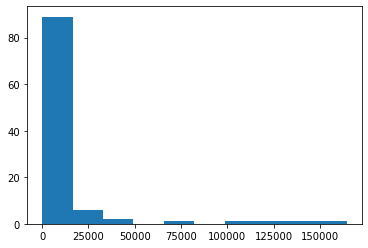

In [11]:
plt.hist(sectores_importantes['total'])
sec2013_total = sec2013[['Total']].iloc[0:102]

In [12]:
x1 = sectores_importantes[['Sector 31-33',
                           'Sector 52 ',
                           'Sector 46 ',
                           'Sector 56']]
y = sec2013_total['Total']

In [13]:
# Convertimos a x1 (el conjunto de variables) en una constante llamada x
x = sm.add_constant(x1)
# Ajustamos el modelo
resultado=sm.OLS(y,x).fit()
# Obtenemos un resumen del modelo
resultado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     305.6
Date:                Mon, 22 Nov 2021   Prob (F-statistic):           4.83e-54
Time:                        23:41:21   Log-Likelihood:                -1132.8
No. Observations:                 102   AIC:                             2276.
Df Residuals:                      97   BIC:                             2289.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1249.5844   1860.347     -0.672      0.503   -4941.858    2442.689
Sector 31-33     0.2393      0.359      0.666      0.507      -0.474       0.952
Sector 52        1.7115      0.123     13.966      0.000       1.468       1.955
Sector 46        4.7315      1.088      4.350      0.000       2.573       6.890
Sector 56        4.1375      0.423      9.770      0.000       3.297       4.978
==============================================================================
Omnibus:                       68.295   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2377.710
Skew:                           1.356   Prob(JB):                         0.00
Kurtosis:                      26.497   Cond. No.                     2.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
sector2018 = pd.read_excel('I_2018.xlsx')
sector2018

,Unnamed: 0,"Sector 11 Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza",Sector 21 Minería,"Sector 22 Generación, transmisión, distribución y comercialización de energía eléctrica, suministro de agua y de gas natural por ductos al consumidor final",Sector 23 Construcción,Sector 31-33 Industrias manufactureras,Sector 43 Comercio al por mayor,Sector 46 Comercio al por menor,"Sector 48-49 Transportes, correos y almacenamiento",Sector 51 Información en medios masivos,...,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102
0,002 Azcapotzalco,0.000,0.0,0.000,486.979,51451.922,9033.669,7726.661,6749.502,2450.853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,003 Coyoacán,0.000,0.0,0.000,631.441,9648.515,6385.625,11014.833,1474.640,2094.415,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,004 Cuajimalpa de Morelos,0.000,0.0,0.000,1810.208,2580.539,3001.041,6229.394,1036.846,-5173.451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,005 Gustavo A. Madero,0.828,0.0,0.000,613.611,9767.841,5202.570,11713.820,3415.909,256.970,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,006 Iztacalco,3.573,0.0,0.000,405.732,10806.302,10381.646,4627.420,461.633,1.769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,112 Villa del Carbón,3.395,0.0,1.903,0.000,27.777,25.070,99.353,0.000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,120 Zumpango,0.000,0.0,0.000,51.180,188.473,246.847,2093.234,122.914,91.855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,121 Cuautitlán Izcalli,0.000,0.0,40.750,166.661,29875.306,5720.502,7786.727,4685.087,395.569,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,122 Valle de Chalco Solidaridad,0.000,0.0,8.377,554.795,0.000,431.341,2043.509,77.969,22.961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
sector2018.dropna()

,Unnamed: 0,"Sector 11 Agricultura, cría y explotación de animales, aprovechamiento forestal, pesca y caza",Sector 21 Minería,"Sector 22 Generación, transmisión, distribución y comercialización de energía eléctrica, suministro de agua y de gas natural por ductos al consumidor final",Sector 23 Construcción,Sector 31-33 Industrias manufactureras,Sector 43 Comercio al por mayor,Sector 46 Comercio al por menor,"Sector 48-49 Transportes, correos y almacenamiento",Sector 51 Información en medios masivos,...,Unnamed: 92,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102


In [20]:
del sector2018['Unnamed: 93']